In [1]:
import mylib.heat_transport as ht
import mylib.hydro_funcs as hf
from mylib.signal import filter_amp
import numpy as np
import matplotlib.pyplot as plt
from mylib.hydro_funcs import vt_, vs_, hatch_alpha
from scipy import optimize
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn-white')

### Test BP

In [2]:
z = np.linspace(0,1,10)
L = 1
To = 15
Tl = 17
q = -1e-6
PwCw = 4180 * 1000
k = 1.15

In [3]:
model = ht.BP(PwCw, L, k, To, Tl, z)

In [4]:
modelled_T = model.equation(q)

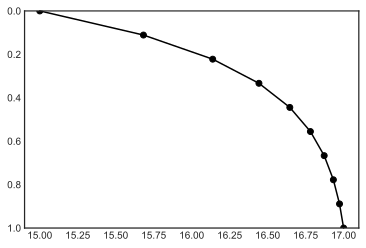

In [5]:
plt.plot(modelled_T, z, c= 'k', marker = 'o')
plt.ylim(1,0);

In [6]:
if model.objective(q, modelled_T) == 0:
    print("Objective function working!")

Objective function working!


In [7]:
model.optimise(modelled_T)

 final_simplex: (array([[-1.e-06],
       [-1.e-06]]), array([0., 0.]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 123
           nit: 60
        status: 0
       success: True
             x: array([-1.e-06])

### Numerical Model Test

In [8]:
z = 0.01
q = -1e-6
Ke = 5e-7
PwCw = 4180 * 1000
PsCs = 800 * 2600
n = 0.3
pc = PwCw ** n * PsCs ** (1-n)
dt = 90
T = np.linspace(10,12,100)
pc = hf.pc_(n, PwCw, PsCs)

In [9]:
model = ht.NumericalTransport(T, z, dt, q, PwCw, pc, Ke)

In [10]:
model.max_timestep()

100.00000000000001

In [11]:
total_time = 86400
n_iterations = int(total_time / dt)
top_bc =  np.linspace(10, 12, n_iterations)
bot_bc =  np.linspace(10, 9, n_iterations)

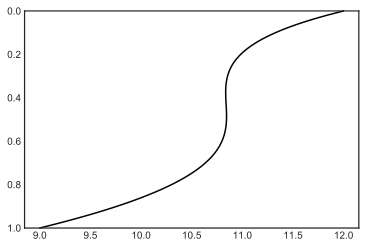

In [12]:
result = model.model(n_iterations, top_bc, bot_bc)
plt.plot(result[0], np.linspace(0, 1,100), label = "1 Day forward", c = 'k')
plt.ylim(1,0);

### Stallman Test

In [13]:
tau = 24 * 60 * 60  # period = 24hrs in secs
t = np.linspace(60, tau, 24) 
CwPw = 4180 * 1000
k = 2.15
q = 1e-5
z = 0.05
dT = 5
ne = 0.3

In [14]:
model = ht.Stallman(PwCw, tau, Ke, ne, pc, dT, z, t)

In [15]:
model.constants(q)

(2.682209014892578e-07, 4.716990566028302)

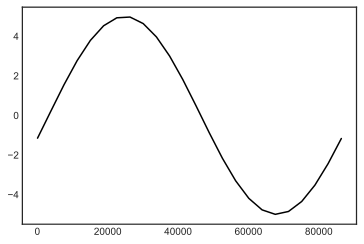

In [16]:
result = model.equation()
plt.plot(t, result, c= 'k');

In [17]:
dTz = filter_amp(result)[0][0]
dTz

4.984128809121484

In [18]:
if model.objective(q, dTz) == 0:
    print("objective working!")

objective working!


In [19]:
model.optimise(dTz)

 final_simplex: (array([[1.e-05],
       [1.e-05]]), array([0., 0.]))
           fun: 0.0
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 2989
           nit: 1000
        status: 2
       success: False
             x: array([1.e-05])

### Hatch amplitude

In [20]:
tau = 24 * 60 * 60  # period = 24hrs in secs
t = np.linspace(60, tau, 24) 
CwPw = 4180 * 1000
PsCs = 850 * 2200
k = 2.15
q = 1e-5
z = 0.05
dT = 5
ne = 0.3
Ar = dT / dTz

In [21]:
pc = hf.pc_(ne, PwCw, PsCs)

In [22]:
model = ht.HatchAmplitude(pc, PwCw, Ke, z, Ar, ne, tau)

In [23]:
Ak = model.equation(q) 
Ak

7.110055907824335e-06

In [24]:
model.objective(q, Ak)

0.0

In [25]:
model.optimise(Ak)

 final_simplex: (array([[1.e-05],
       [1.e-05]]), array([0., 0.]))
           fun: 0.0
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 2951
           nit: 1000
        status: 2
       success: False
             x: array([1.e-05])